Ex34b

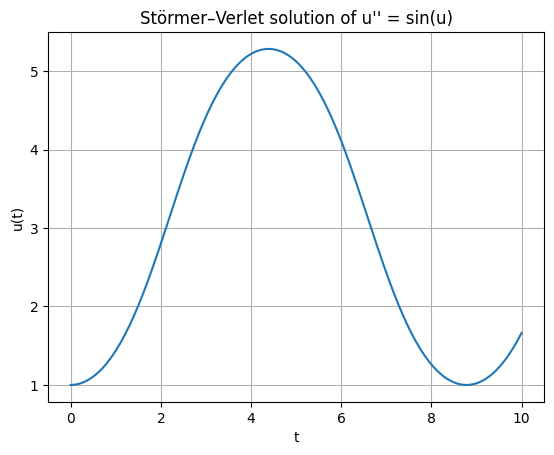

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def stormer_verlet(f, u0, v0, h, N):
    u = np.zeros(N+1)
    u[0] = u0
    
    u[1] = u0 + h*v0 + 0.5*h**2*f(u0)

    for k in range(1, N):
        u[k+1] = 2*u[k] - u[k-1] + h**2*f(u[k])
    
    return u

def f(u):
    return np.sin(u)

u0 = 1.0
v0 = 0.0
h = 0.05
T = 10
N = int(T / h)

u = stormer_verlet(f, u0, v0, h, N)
t = np.linspace(0, T, N+1)

# plot
plt.plot(t, u)
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Störmer–Verlet solution of u'' = sin(u)")
plt.grid()
plt.show()


Ex35b


In [33]:
def runge(f, t, u0):
    n = len(t)
    m = len(u0)
    U = np.zeros((m,n))
    U[:,0] = u0
    
    for j in range(n-1):
        h  = t[j+1]-t[j]
        k1 = f(t[j], U[:,j])
        k2 = f(t[j]+h/2, U[:,j]+h/2*k1)
        U[:,j+1] = U[:,j] + h*k2
        
    return U

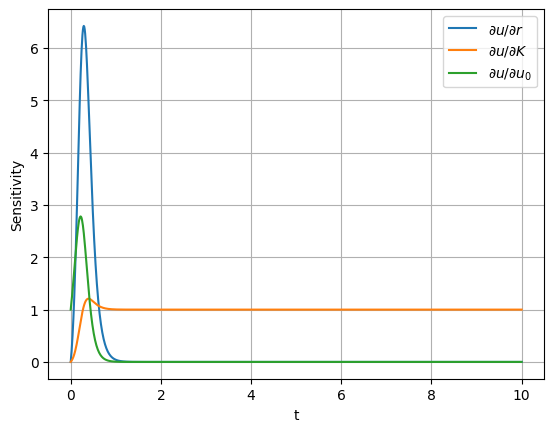

In [34]:
import numpy as np
import matplotlib.pyplot as plt

r = 1.0
K = 10.0
u0 = 1.0

T = 10
N = 1000
t = np.linspace(0, T, N)

def rhs(t, y):
    u, sr, sK, su0 = y
    
    f = r * u * (K - u)
    df_du = r * (K - 2*u)
    
    du = f
    dsr = df_du * sr + u * (K - u)
    dsK = df_du * sK + r * u
    dsu0 = df_du * su0
    
    return np.array([du, dsr, dsK, dsu0])

y0 = np.array([u0, 0.0, 0.0, 1.0])

U = runge(rhs, t, y0)

u, sr, sK, su0 = U

# plot
plt.figure()
plt.plot(t, sr, label=r"$\partial u / \partial r$")
plt.plot(t, sK, label=r"$\partial u / \partial K$")
plt.plot(t, su0, label=r"$\partial u / \partial u_0$")
plt.xlabel("t")
plt.ylabel("Sensitivity")
plt.legend()
plt.grid()
plt.show()


Ex36c


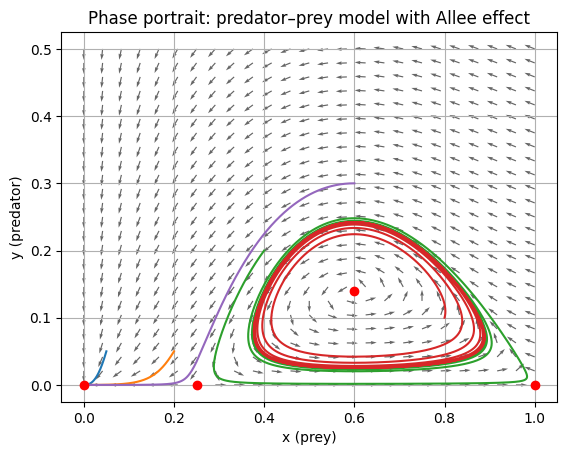

In [1]:
import numpy as np
import matplotlib.pyplot as plt

psi = 0.25
eta = 0.6
alpha = 1.0

def f(x, y):
    dx = x*(x - psi)*(1 - x) - alpha*x*y
    dy = y*(x - eta)
    return dx, dy


# grid 
x_vals = np.linspace(0, 1.0, 25)
y_vals = np.linspace(0, 0.5, 25)
X, Y = np.meshgrid(x_vals, y_vals)
DX, DY = f(X, Y)

# normalize arrows
speed = np.sqrt(DX**2 + DY**2)
DX = DX / (speed + 1e-8)
DY = DY / (speed + 1e-8)

T = 200.0
dt = 0.01
N = int(T / dt)

initial_conditions = [
    (0.05, 0.05),
    (0.2, 0.05),
    (0.4, 0.2),
    (0.8, 0.1),
    (0.6, 0.3),
]

plt.figure()
plt.quiver(X, Y, DX, DY, alpha=0.6)

for x0, y0 in initial_conditions:
    x = np.zeros(N)
    y = np.zeros(N)
    x[0], y[0] = x0, y0
    
    for k in range(N-1):
        dx, dy = f(x[k], y[k])
        x[k+1] = (x[k] + dt*dx)
        y[k+1] = (y[k] + dt*dy)

    plt.plot(x, y)

equilibria = [
    (0.0, 0.0),
    (psi, 0.0),
    (1.0, 0.0),
    (eta, (eta - psi)*(1 - eta)/alpha)
]

for ex, ey in equilibria:
    plt.plot(ex, ey, 'ro')

plt.xlabel("x (prey)")
plt.ylabel("y (predator)")
plt.title("Phase portrait: predator–prey model with Allee effect")
plt.grid()
plt.show()
